<a href="https://colab.research.google.com/github/hyprex-deva/Cat-vs-Dog/blob/main/Cats_vs_Dogs_(Final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

# **Introduction:**
## In this project, we are going to use Convolutional Neural Networks (CNNs) to classify images of cats and dogs. We will build and train a deep learning model using the Keras library in Python, and evaluate its performance on a test dataset.

# **Dataset:**
# We will be using the Cats vs Dogs dataset, which contains 12,500 images of cats and dogs respectively. The dataset is divided into 2 sets: a training set with 10,000 images, and a test set with 2,500 images.

# **Methodology:**
# We will use a pre-trained convolutional neural network called as a base model, and we will add additional layers on top of it to train it for our specific task of classifying cats and dogs. We will fine-tune the pre-trained CNN model by training only the last few layers of the model, while keeping the earlier layers fixed.

# **We will use the following steps to build our CNN model:**

>## 1.Load the dataset and split it into training and testing sets.
>## 2.Prepare the data by resizing the images and applying data augmentation techniques.
>## 3.Load the pre-trained CNN model and add additional layers on top of it.
>## 4.Fine-tune the model by training only the last few layers.
>## 5.Evaluate the model on the test dataset.

# **Here's the Python code for our CNN model:**

---


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:06<00:00, 195MB/s]
100% 1.06G/1.06G [00:06<00:00, 180MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [6]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [8]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 86s 113ms/step - loss: 1.4345 - accuracy: 0.5741 - val_loss: 0.6442 - val_accuracy: 0.5838
Epoch 2/10
625/625 [==============================] - 69s 110ms/step - loss: 0.6135 - accuracy: 0.6705 - val_loss: 0.6287 - val_accuracy: 0.6986
Epoch 3/10
625/625 [==============================] - 68s 109ms/step - loss: 0.6031 - accuracy: 0.6971 - val_loss: 0.6531 - val_accuracy: 0.6400
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5606 - accuracy: 0.7222 - val_loss: 0.5513 - val_accuracy: 0.7254
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5325 - accuracy: 0.7381 - val_loss: 0.5862 - val_accuracy: 0.6988
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5061 - accuracy: 0.7595 - val_loss: 0.5119 - val_accuracy: 0.7554
Epoch 7/10
625/625 [==============================] - 68s 109ms/step - loss: 0.4738 - accuracy: 0.7834 - val_loss: 0.5569 - val_ac

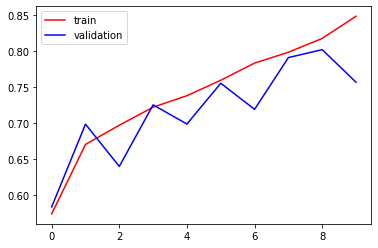

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

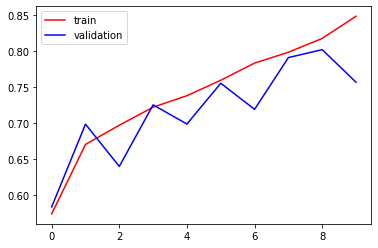

In [13]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

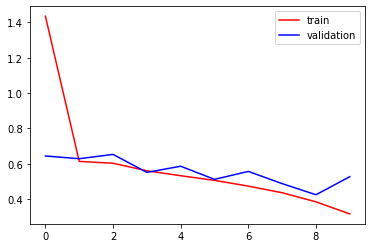

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

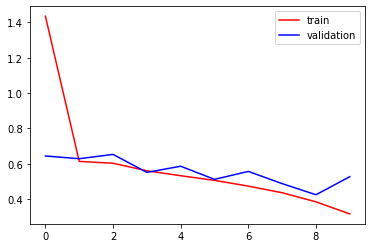

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [16]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [17]:
import cv2

In [35]:
test_img1 = cv2.imread('/content/cat1.jpeg')
test_img2 = cv2.imread('/content/cat2.jpeg')
test_img3 = cv2.imread('/content/dog1.jpeg')
test_img4 = cv2.imread('/content/dog2.jpeg')

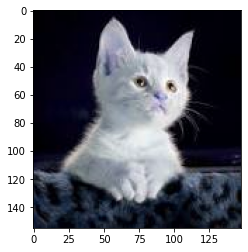

In [36]:
plt.imshow(test_img1)

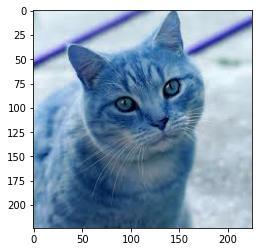

In [25]:
plt.imshow(test_img2)

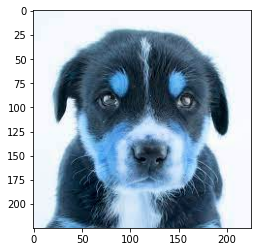

In [26]:
plt.imshow(test_img3)

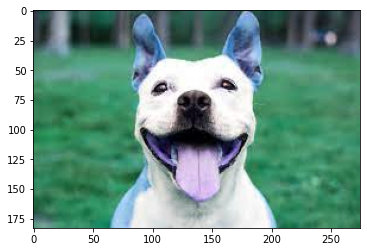

In [27]:
plt.imshow(test_img4)

In [37]:
test_img1.shape

(155, 148, 3)

In [38]:
test_img1 = cv2.resize(test_img1,(256,256))
test_input1 = test_img1.reshape((1,256,256,3))

test_img2 = cv2.resize(test_img2,(256,256))
test_input2 = test_img2.reshape((1,256,256,3))

test_img3 = cv2.resize(test_img3,(256,256))
test_input3 = test_img3.reshape((1,256,256,3))

test_img4 = cv2.resize(test_img4,(256,256))
test_input4 = test_img4.reshape((1,256,256,3))

In [39]:
print(model.predict(test_input1))
print(model.predict(test_input2))
print(model.predict(test_input3))
print(model.predict(test_input4))

1/1 [==============================] - 0s 22ms/step
[[0.]]
1/1 [==============================] - 0s 19ms/step
[[0.37915704]]
1/1 [==============================] - 0s 18ms/step
[[1.]]
1/1 [==============================] - 0s 21ms/step
[[1.]]


#If Output is ~1 then its a Dog and if Output is ~0 then its a Cat